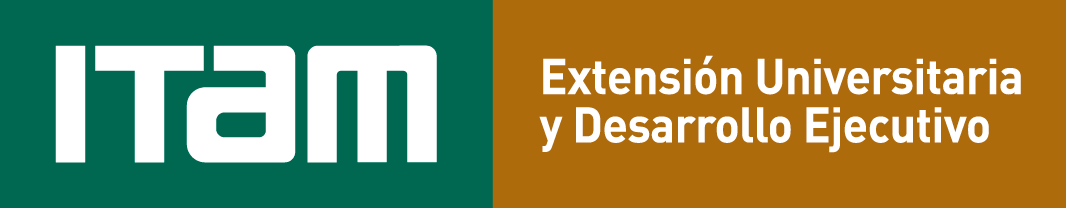

# Clase 8 - Módulos de la librería estándar 

Daremos un recorrido por los módulos más importantes de la librería estándar

Como ya hemos visto, podemos importar nuevos módulos de la librería extándar de Python o de terceros (o hechos por nosotros mismos) de la siguiente forma:

```python
import module_name                      ## option 1

import module_name as short_name        ## option 2

from module_name import funct_name      ## option 3

from module_name import funct_name as shor_funct_name    ## option 4

```

In [1]:
pip install pkg_name

ERROR: Could not find a version that satisfies the requirement pkg_name (from versions: none)
ERROR: No matching distribution found for pkg_name
Note: you may need to restart the kernel to use updated packages.


De acuerdo a cada opción, podemos acceder a las funciones definidas en cada módulo de la siguiente forma:

In [2]:
### vemos ejemplos importando math

import math

math.cos(math.pi)

-1.0

In [3]:
pi = 10

In [4]:
pi

10

In [5]:
from math import pi

pi

3.141592653589793

In [ ]:
from math import factorial as fact

fact(10)

In [ ]:
import math as m

m.acos(0)

Dentro de python hay varios paquetes que podemos importar sin necesidad de instalarlos:


* **```math```** : para operaciones matemáticas y algunas constantes.

* **```random```** : números aleatorios y generar muestras aleatorias.

* **```complex```** : trabajar con números complejos.

* **```os```** : creación y administración de ficheros.

* **```datetime```**, **```time```** : trabajar con fechas y tiempo.

* etc


Una página interesante para cosas básicas de la librería estándar:

http://research.iac.es/sieinvens/python-course/modulos.html#la-libreria-estandar-de-python

$$$$

Aquí podemos ver la estructura general de un paquete de python:

In [ ]:
import random

random.randint(0, 10)

In [ ]:
random.random()

In [ ]:
random.sample([1,2,3,4,5], 2)

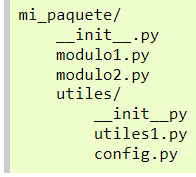

Con cualquier paquete, podemos acceder a la ayuda mendiante la siguiente función:

In [ ]:
import math
help(math)

Si queremos enlistar todos los paquetes que tenemos (instalados con pip + librería estándar)

In [ ]:
import distutils.sysconfig as sysconfig
import os
std_lib = sysconfig.get_python_lib(standard_lib=True)
for top, dirs, files in os.walk(std_lib):
    for nm in files:
        if nm != '__init__.py' and nm[-3:] == '.py':
            print(os.path.join(top, nm)[len(std_lib)+1:-3].replace(os.sep, '.'))

Veamos algunos de los paquetes más importantes:

## Open

La función `open`nos permite abrir un archivo encontrado desde nuestra pc. Con un archivo abierto, podemos escribir, leer o añadir. **Es importante tener en cuenta en donde estamos trabajando y en donde se encuentra el archivo que queremos leer**

Actualmente me encuentro en este directorio: 

In [6]:
pwd

'/Users/andrespadronquintana/Desktop/DIPLOMADO MACHINE LEARNING DS/MÓDULO 1'

El archivo que deseamos leer se llama `ejemplo.txt`, el cual se encuentra dentro de mi carpeta actual:

In [7]:
ls

amzn_data.csv              clase_04_07.ipynb
amzn_data.parquet          clase_07.ipynb
clase_01.ipynb             clase_08.ipynb
clase_02_alumnos.ipynb     Numpy.ipynb
clase_03.ipynb             Pandas.ipynb
clase_04_07_alumnos.ipynb  TAREAS1/


Existen **dos maneras de acceder directamente** al archivo sin necesidad de modificar el directorio en donde estamos trabajando:

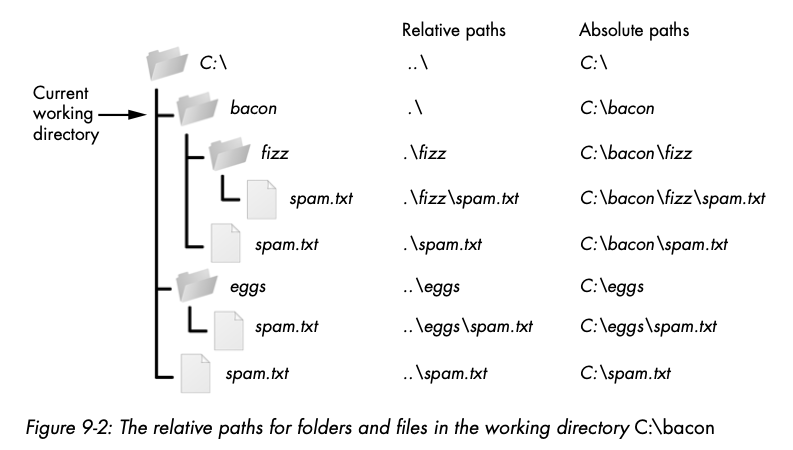

$$$$
Abrimos y leemos un archivo en Python con la función `open` cuayo primer argumento es la ruta del archivo a acceder

```python
open(file,mode='r',buffering=-1,encoding=None,error=None, newline=None,closefd=True, opener=None)
```

In [8]:
pwd

'/Users/andrespadronquintana/Desktop/DIPLOMADO MACHINE LEARNING DS/MÓDULO 1'

In [9]:
route = "C:\\Users\\artur\\Documents\\DS_ML - ITAM\\modulo 1\\G15 - mayo 2024\\ejemplo.txt"

f = open(route)
f

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\artur\\Documents\\DS_ML - ITAM\\modulo 1\\G15 - mayo 2024\\ejemplo.txt'

In [ ]:
type(f)

El resultado de abrir un archivo es un `file object` sobre el cual podemos manipular antes de visualizar el contenido del archivo. Dependiendo del *modo* seleccionado para trabajar con el archivo, `f` toma diferentes propiedades. Por `default` el modo es `r` (read), sin embargo, existen diferentes modos de trabajo. Enunciaremos los más comunes: 
* `r`: leer (default)
* `w`: escribir
* `a`: escribir. Agregar información al final del archivo si este ya existe
* `b`: binario. Para trabajr con archivo binario

In [12]:
# Con el método f.read() leemos el contenido el archivo
print(f.read())

NameError: name 'f' is not defined

Para evitar posibles conflictos en el archivo, es importante cerrarlo una vez que se haya terminado de usar

In [10]:
f.close()

NameError: name 'f' is not defined

In [11]:
pwd

'/Users/andrespadronquintana/Desktop/DIPLOMADO MACHINE LEARNING DS/MÓDULO 1'

In [ ]:
#Código completo para abrir y ver contenido
route = "ejemplo.txt"

f = open(route)

print(f.read())

f.close()

In [ ]:
f.read()

Una vez abierto un archivo es imprescindible cerrarlo. Para tener una legibilidad y no olvidar cerrar el archivo, se puede hacer uso del *keyword* `with` que abre un archivo dentro de un bloque de texto para posteriorment cerrarlo. 

El *keyword* `with` toma un objeto (en nuestro caso es un lector de archivos) que incluya dos métodos: `.open` y `.close`. Python se encarga de abrir y el cerrar el archivo. 

```python
with open(filename,mode) as f:
    <manipulacion del archivo>

```

In [ ]:
route = "ejemplo.txt"

with open(route, "r") as file: 
    print(file.read())
    #file.close()

Si tratamos de volver a leer un archivo, el siguient error nos aparece: 


In [ ]:
help(open)

In [ ]:
file.read()

Este error anuncia que al archivo ya ha sido cerrado con `with`.

### Escribiendo Archivos
El modo `"w"` dentro de `open` nos permite crear nuevos archivos. La sintáxis sería la siguiente: 

```python
open(filename,"w")

```

In [ ]:
#Escribir número del 0 al 9
route = "ejemplo_02.txt"

with open(route,"w") as f: 
    for i in range(5):
        f.write(str(i) + " ")

##### Notas
* El código anterior escribió un caracter después de otro.


* Fue necesario convertir nuestro `int` a un `str` para poder escribir su valor. 


* El contenido del archivo se sobreescribe; ¿cómo podríamos evitar eso?

In [ ]:
type(open(route,"a"))

In [ ]:
## si queremos escribir más cosas en el fichero:
route = "ejemplo_02.txt"

with open(route,"a") as f:
    f.write("\n")
    for i in range(15):
        f.write("*" + str(i) + "*")

# Módulo I/O

# JSON
JSON (JavaScript Object Notation) es un formato de bajo peso para intercambio de información basado en el lenguaje de programación de JavaScript. Es parecido, en estructura, a un diccionario. Podemos cargar objetos json desde python con la librería `json`

In [13]:
import json

In [14]:
dir(json)

['JSONDecodeError',
 'JSONDecoder',
 'JSONEncoder',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_default_decoder',
 '_default_encoder',
 'codecs',
 'decoder',
 'detect_encoding',
 'dump',
 'dumps',
 'encoder',
 'load',
 'loads',
 'scanner']

Para cargar archivos json, es necesario abrir un archivo y usar la función `json.load()` aplicado sobre el archivo abierto. 

In [15]:
route = "colors.json"

with open(route,"r") as f: 
    print(f.read())

FileNotFoundError: [Errno 2] No such file or directory: 'colors.json'

In [16]:
## si el fichero está en el mismo directorio, podemos hacer esto:
route = "colors.json"

with open(route) as f: 
    colors = json.load(f)
    
type(colors)

FileNotFoundError: [Errno 2] No such file or directory: 'colors.json'

In [ ]:
colors   ## {"colors" : list}

In [ ]:
colors.keys()

In [ ]:
colors["colors"]

In [ ]:
type(colors["colors"])

In [ ]:
len(colors["colors"])

In [ ]:
#Cómo accederíamos a las características de black
colors['colors'][0]

In [ ]:
type(colors['colors'][0])

In [ ]:
#Como accederían un nivel más profundo, por ejemplo: type
colors['colors'][0]["code"]

In [ ]:
#Cómo agregariían al final del diciconario original un nuevo color verde
type(colors["colors"])

In [ ]:
colors["colors"].append({"color":"green"}) #agregar al final

In [ ]:
colors

In [ ]:
colors["categoría_nueva"] = [{'color':'blue'}] #estaría fuera del original

In [ ]:
colors

In [ ]:
colors.keys()

## CSV

In [17]:
import csv 

In [18]:
dir(csv)

['Dialect',
 'DictReader',
 'DictWriter',
 'Error',
 'QUOTE_ALL',
 'QUOTE_MINIMAL',
 'QUOTE_NONE',
 'QUOTE_NONNUMERIC',
 'Sniffer',
 'StringIO',
 '_Dialect',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 'excel',
 'excel_tab',
 'field_size_limit',
 'get_dialect',
 'list_dialects',
 're',
 'reader',
 'register_dialect',
 'unix_dialect',
 'unregister_dialect',
 'writer']

In [ ]:
#leer archivo
route = "mun_cdmx.csv"

with open(route) as f:
    munmx = csv.DictReader(f)
    print(type(munmx))
    print(munmx.fieldnames)

In [ ]:
munmx

In [ ]:
type(munmx)

In [ ]:
for row in munmx:
    print(row)

In [ ]:
#route="../files/lec07/mun_cdmx.csv"
with open(route) as f:
    munmx=csv.DictReader(f)
    print(munmx.fieldnames)
    print("\n")
    for row in munmx:
        print(row)
        #int_clave=int(row["CVE_MUN"])
        #nom_mun=int(row[""])

In [ ]:

with open(route) as f:
    munmx=csv.DictReader(f)
    #print(munmx.fieldnames)
    for row in munmx:
        #print(row)
        int_clave=int(row["col1"])
        nom_mun=row["col2"]
        print(f"{int_clave:02}\t{nom_mun}")

In [ ]:
import pandas as pd
pd.read_csv(route)

In [ ]:
## revisar porque pone saltos de linea

#Escritura
route = "csv_ejemplo.csv"

with open(route,"w") as f:
    csvfile = csv.DictWriter(f,["col1","col2"])
    
    csvfile.writeheader()
    
    for num in range(11):
        csvfile.writerow({"col1":num,"col2":num**2})

## OS

Este paquete contiene funciones que dependen del sistema operativo que estamos usando; nos permiten acceder a rutas, lectura y escritura de ficheros y manejo a alto nivel de nuestros archivos.

In [19]:
import os

In [20]:
dir(os)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_KILLED',
 'CLD_STOPPED',
 'CLD_TRAPPED',
 'DirEntry',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'GenericAlias',
 'Mapping',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EVTONLY',
 'O_EXCL',
 'O_EXLOCK',
 'O_FSYNC',
 'O_NDELAY',
 'O_NOCTTY',
 'O_NOFOLLOW',
 'O_NONBLOCK',
 'O_RDONLY',
 'O_RDWR',
 'O_SHLOCK',
 'O_SYMLINK',
 'O_SYNC',
 'O_TRUNC',
 'O_WRONLY',
 'POSIX_SPAWN_CLOSE',
 'POSIX_SPAWN_DUP2',
 'POSIX_SPAWN_OPEN',
 'PRIO_PGRP',
 'PRIO_PROCESS',
 'PRIO_USER',
 'P_ALL',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_PGID',
 'P_PID',
 'P_WAIT',
 'PathLike',
 'RTLD_GLOBAL',
 'RTLD_LAZY',
 'RTLD_LOCAL',
 'RTLD_NODELETE',


In [21]:
help(os)

Help on module os:

NAME
    os - OS routines for NT or Posix depending on what system we're on.

MODULE REFERENCE
    https://docs.python.org/3.11/library/os.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This exports:
      - all functions from posix or nt, e.g. unlink, stat, etc.
      - os.path is either posixpath or ntpath
      - os.name is either 'posix' or 'nt'
      - os.curdir is a string representing the current directory (always '.')
      - os.pardir is a string representing the parent directory (always '..')
      - os.sep is the (or a most common) pathname separator ('/' or '\\')
      - os.extsep is the extension separator (always '.')
      - os.altsep is the alternate pathn

In [22]:
os.getcwd()

'/Users/andrespadronquintana/Desktop/DIPLOMADO MACHINE LEARNING DS/MÓDULO 1'

In [23]:
pwd

'/Users/andrespadronquintana/Desktop/DIPLOMADO MACHINE LEARNING DS/MÓDULO 1'

In [ ]:
os.listdir("../")
#os.listdir()

In [ ]:
#pueden escribir carpeta también desdea aquí
os.mkdir("prueba")

In [ ]:
os.listdir()

In [ ]:
#si quiero elimiar la carpeta
os.removedirs("prueba")

In [ ]:
#voy a verificar si está o no está. Y ya no aparece. 
os.listdir()

In [ ]:
# también podemos accederr a la carpeta actual así
os.listdir(".\\")

In [ ]:
# cambiar la path

nueva_path = "C:\\Users\\artur\\Documents\\DS_ML - ITAM"

os.chdir(nueva_path)

In [ ]:
os.getcwd()

## Otros módulos *Standard* Library

## Collections
El módulo [collection](https://docs.python.org/3.6/library/collections.html#collections.Counter) implementa colecciones especializadas como alternativas incluidas en Python: `dict`, `list`, `set` y `tuples`.

In [24]:
from collections import Counter

In [25]:
c1 = Counter("aabbbddd222ccdddeeeee")

In [26]:
c1

Counter({'a': 2, 'b': 3, 'd': 6, '2': 3, 'c': 2, 'e': 5})

In [27]:
type(c1)

collections.Counter

In [28]:
c1["a"]

2

In [29]:
test = {'a': 2, 'b': 3, 'd': 6, '2': 3, 'c': 2, 'e': 5}

test["A"] # no está por eso marca error

KeyError: 'A'

In [30]:
c1["A"] # no me da error

0

In [31]:
c1["x"]

0

¿Cómo hacemos este tipo de cálculos sin usar Counter?

In [32]:
cadena = "aabbbdddccdddeeeee"

result = {}

for c in set(cadena):
    result[c] = cadena.count(c)
    
result

{'a': 2, 'e': 5, 'b': 3, 'd': 6, 'c': 2}

In [33]:
{c : cadena.count(c) for c in set(cadena)}

{'a': 2, 'e': 5, 'b': 3, 'd': 6, 'c': 2}

In [34]:
result["a"]

2

In [35]:
result["z"]

KeyError: 'z'

## Defaultdict

Un `defaultdict` es un pseudo-diccionario de Python que nos permite manipular la entrada de cualquier nuevo elemento en el diccionario sin necesidad de declararlo como nuevo explícitamente

Ejemplo: Supongamos que queremos crear paso a paso un diccionario llamado `instrumentos` con tipos y subtipos de instrumentos financiero; algo como lo siguiente:

```python
{ 'derivados': ['opciones', 'forwards', 'swaps'],
  'deuda': ['bonosM', 'cetes'],
  'bursatil': ['AAPL', 'GOOG'] }
```

In [36]:
#como lo haríamos sin conocer defaultdict
instrumentos = {}
#quieren agregar opciones a la llave derivados

#tendrían que verificar primero que derivados existe. 
if "derivados" not in instrumentos.keys():
    instrumentos["derivados"] = [] #tendrían que crear el arreglo/lista para hacer el append
    instrumentos["derivados"].append("opciones")
    
instrumentos

{'derivados': ['opciones']}

In [37]:
instrumentos["derivados"].append("forwards")
instrumentos["derivados"].append("swaps")

instrumentos

{'derivados': ['opciones', 'forwards', 'swaps']}

Una solución al problema anterior se logra mediante un `defaultdic` inicializando como una lista. 

In [38]:
from collections import defaultdict

instrumentos = defaultdict(list)

In [39]:
instrumentos

defaultdict(list, {})

In [40]:

instrumentos["derivados"].append("opciones")
instrumentos["derivados"].append("forwards")
instrumentos["derivados"].append("swaps")

instrumentos["deuda"].append("bonosM")
instrumentos["deuda"].append("cetes")

instrumentos["bursatil"].append("AAPL")
instrumentos["bursatil"].append("GOOG")

instrumentos
#no hay necesidad de tener que declarar la lista antes del append

defaultdict(list,
            {'derivados': ['opciones', 'forwards', 'swaps'],
             'deuda': ['bonosM', 'cetes'],
             'bursatil': ['AAPL', 'GOOG']})

In [41]:
type(instrumentos)

collections.defaultdict

In [42]:
instrumentos["derivados"]

['opciones', 'forwards', 'swaps']

In [43]:
instrumentos.keys()

dict_keys(['derivados', 'deuda', 'bursatil'])

In [44]:
instrumentos.values()

dict_values([['opciones', 'forwards', 'swaps'], ['bonosM', 'cetes'], ['AAPL', 'GOOG']])

In [ ]:
instrumentos["bursatil"].append("VIX")

instrumentos

In [ ]:
# esto es medio basura porque no devuelve error:
instrumentos["nueva_key"] = 5

instrumentos

## Namedtuple

In [45]:
from collections import namedtuple

In [46]:
a = ("a", "b", "c")

## acceder al tercer elemento
a[2]

'c'

In [ ]:
def test(nombre, tipo, mesa, nominal):
    pass



In [47]:
# aqui definimos la tupla con nombres:

Instr = namedtuple("Instrumento", ["nombre", "tipo", "mesa", "nominal", "delta", "strike"])

In [48]:
# una tupla con nombre es un tipo de dato:
type(Instr)

type

In [51]:
i1 = Instr(nombre="Asian", tipo="opcion", mesa="dermx", nominal=1000, delta=0.05,strike = 105)

In [52]:
i1

Instrumento(nombre='Asian', tipo='opcion', mesa='dermx', nominal=1000, delta=0.05, strike=105)

In [53]:
type(i1)

__main__.Instrumento

In [ ]:
i1.  #accedo a los elementos que le puse al momento de crearlo

In [54]:
i1.mesa

'dermx'

In [55]:
i1.nombre, i1.mesa  #son atributos. 

('Asian', 'dermx')

In [56]:
i1.nominal

1000

In [57]:
def price_instrument(notional, tipo_instr, desk, delta, instr_name, strike):
    #hace varias cosas usando las variables dadas por el usuario
    price = 1_000
    return price

def price_instrument_2(instr):
    # en este caso, la variable instr es del tipo Instrument
    instr.nombre
    instr.nominal
    instr.strike
    

In [58]:


def function_k(**kargs):
    name = kargs["name"]
    tipo = kargs["tipo"]
    desk = kargs["mesa"]
    print(f"El derivado {name} es del tipo {tipo} y pertenece a la mesa {desk}-")
    

def function(my_tuple):
    name = my_tuple.nombre
    tipo = my_tuple.tipo
    desk = my_tuple.mesa
    nominal = my_tuple.nominal
    print(f"El derivado {name} es del tipo {tipo} y pertenece a la mesa {desk}-")


def my_funct(name, type_inst, desk, nom):
    #aqui va la def de mi función
    return 0
    

def my_funct2(tuple_named, a1, a2, asd, sdfsf, srgr, rter, rt):
    # "def de funct_2"
    return 0

In [59]:
function_k(name="Asian", tipo="opcion", mesa="dermx", nominal=1000)

El derivado Asian es del tipo opcion y pertenece a la mesa dermx-


In [60]:
function(i1)

El derivado Asian es del tipo opcion y pertenece a la mesa dermx-


# Datetime

In [1]:
import datetime

dir(datetime)

#datetime.datetime.now()

['MAXYEAR',
 'MINYEAR',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'date',
 'datetime',
 'datetime_CAPI',
 'sys',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

In [2]:
from datetime import datetime  ## esto es así porque datetime es un módulo dentro del paquete time

from datetime import timedelta

## si hacemos esto:
## import datetime
## vamos a importar todos los módulos que están dentro del paquete datetime

In [3]:
dir(timedelta)

['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'days',
 'max',
 'microseconds',
 'min',
 'resolution',
 'seconds',
 'total_seconds']

In [4]:
dir(datetime)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [5]:
from datetime import datetime

start_date = datetime(2025, 7, 9) #año, mes, día para definir una 

In [6]:
type(start_date)

datetime.datetime

In [7]:
start_date

datetime.datetime(2025, 7, 9, 0, 0)

In [ ]:
dir(start_date)

In [8]:
#0 es lunes y el domingo es 6

start_date.weekday() #paréntesis son métodos

2

In [9]:
start_date.weekday

<function datetime.weekday>

In [10]:
start_date.month # sin paréntesis son atributos

7

In [11]:
start_date.year

2025

In [12]:
start_date.minute

0

In [13]:
start_date.hour

0

In [14]:
print(f"{start_date.day}/{start_date.month}/{start_date.year}")

9/7/2025


In [15]:
start_date.strftime("%Y-%m-%d")

'2025-07-09'

In [16]:
type(start_date.strftime("%Y-%m-%d"))

str

In [17]:
today = datetime.now()
today

datetime.datetime(2025, 7, 9, 21, 51, 47, 528483)

In [18]:
today.strftime("%H:%M:%S.%f")

'21:51:47.528483'

In [19]:
today.strftime("%B")

'July'

In [20]:
## aqui vemos todos los formatos que podemos combinar

dt = datetime.now()

print(dt)
print('\nDirectives\n--------------')
print(dt.strftime('Weekday short version : %a'))
print(dt.strftime('Weekday full version  : %A'))
print(dt.strftime('Weekday as a number   : %w'))
print(dt.strftime('Day of month          : %d'))
print(dt.strftime('Month Name short ver  : %b'))
print(dt.strftime('Month Name full ver   : %B'))
print(dt.strftime('Month as a number     : %m'))
print(dt.strftime('Year short version    : %y'))
print(dt.strftime('Year full version     : %Y'))
print(dt.strftime('Hour (00-23)          : %H'))
print(dt.strftime('Hour (00-11)          : %I'))
print(dt.strftime('AM/PM                 : %p'))
print(dt.strftime('Minute                : %M'))
print(dt.strftime('Second                : %S'))


print('\nFormatted Date Strings\n--------------')
print(dt.strftime('%a %d-%m-%Y'))
print(dt.strftime('%a %d/%m/%Y'))
print(dt.strftime('%a %d/%m/%y'))
print(dt.strftime('%A %d-%m-%Y, %H:%M:%S'))
print(dt.strftime('%X %x'))

2025-07-09 21:52:38.577254

Directives
--------------
Weekday short version : Wed
Weekday full version  : Wednesday
Weekday as a number   : 3
Day of month          : 09
Month Name short ver  : Jul
Month Name full ver   : July
Month as a number     : 07
Year short version    : 25
Year full version     : 2025
Hour (00-23)          : 21
Hour (00-11)          : 09
AM/PM                 : PM
Minute                : 52
Second                : 38

Formatted Date Strings
--------------
Wed 09-07-2025
Wed 09/07/2025
Wed 09/07/25
Wednesday 09-07-2025, 21:52:38
21:52:38 07/09/25


In [21]:
str_date = "2020/10/7"

dt_date = datetime.strptime(str_date, "%Y/%m/%d")
dt_date

datetime.datetime(2020, 10, 7, 0, 0)

In [24]:
str_date = "7-01-20"

dt_date_2 = datetime.strptime(str_date, "%d-%m-%y")
dt_date_2

datetime.datetime(2020, 1, 7, 0, 0)

In [25]:
from datetime import timedelta

In [26]:
dt_date

datetime.datetime(2020, 10, 7, 0, 0)

In [27]:
dt_date + 365

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'int'

In [28]:
dt_date + timedelta(days=365)

datetime.datetime(2021, 10, 7, 0, 0)

In [ ]:
datetime.now() - dt_date

In [ ]:
delta = datetime.now() - dt_date #me da el número de segundo desde que inicia el día (date_date es hoy)
delta 

In [ ]:
delta.microseconds

In [ ]:
delta.seconds

In [ ]:
delta.days 

In [ ]:
(datetime.now() - dt_date).days

Dando formato a las fechas: Más información en: 
https://docs.python.org/3/library/datetime.html?highlight=datetime#strftime-and-strptime-behavior

In [ ]:
start_date

In [ ]:
start_date.strftime("%m-%d-%y")

In [ ]:
start_date.strftime("%A, %B %d %Y")

In [ ]:
duracion = timedelta(days=252)

In [ ]:
duracion

In [ ]:
maturity = start_date + duracion

In [ ]:
maturity

In [ ]:
maturity.strftime("%A, %B %d %Y")

In [ ]:
#string a datetime. Le estamos pasando un string en el primer arguemnto y el segundo le dice 
#en qué formato viene ese string
datetime.strptime("2021.10.07","%Y.%m.%d")

In [ ]:
datetime.strptime("2021/10/07","%Y/%m/%d")

In [ ]:
today = datetime(2023,1,31)
today

In [ ]:
## sumar 1 mes al 31 de enero
today + timedelta(days=59)

In [ ]:
## sumar 1 meses
resultado = datetime(today.year, today.month+2, today.day)
resultado

In [ ]:
## sumar 3 meses
resultado = datetime(today.year+3, today.month , today.day)
resultado

Supongamos que estamos a 30/01/2023, sumamos 1 día y luego 1 mes

¿Es lo mismo sumar 1 mes y luego 1 día?


( 30/01/2023  + 1día ) + 1month  == ( 30/01/2023 + 1month ) + 1day

In [29]:
from dateutil.relativedelta import relativedelta

In [30]:
today

datetime.datetime(2025, 7, 9, 21, 51, 47, 528483)

In [32]:
today + relativedelta(months=14)

datetime.datetime(2026, 9, 9, 21, 51, 47, 528483)

In [34]:
fecha = datetime(2025,2,28)

(fecha + relativedelta(months=1)) + relativedelta(days=1)

datetime.datetime(2025, 3, 29, 0, 0)

In [35]:
(fecha + relativedelta(days=1)) + relativedelta(months=1)

datetime.datetime(2025, 4, 1, 0, 0)

# Intro a NumPy

NumPy es una biblioteca de Python que proporciona un objeto de matriz multidimensional y una variedad de rutinas para operaciones rápidas en matrices, que incluyen matemáticas, lógicas, manipulación de formas, clasificación, selección, transformadas de Fourier discretas, álgebra lineal básica, operaciones estadísticas básicas, simulación aleatoria y mucho más.


Los objetos principales de este paquete se conocen como ndarrays, que no son otra cosa más que matrices (o vectores). El código está optimizado para realizar operaciones entre matrices (vectores), esa es la razón principal por la que es preferible usar `array` en vez de `list`.

$$$$

Aquellos paquetes que no forman parte de la librería estándar, como NumPy, se pueden instalar desde consola o por medio de IDE:

```pytho
pip install package_name
```

In [ ]:
pip install numpy

Esto nos permite ver un listado de todos los paquetes que hemos instalado:

In [ ]:
pip freeze

Veremos una introducción a NumPy (Numerical Python) y la próxima clase continuaremos viendo algunos otros ejemplos, pero si tienen tiempo, pueden darle un vistazo a la página principal del paquete:

https://numpy.org/

In [ ]:
pip install numpy==n_version --proxy https:// 

In [ ]:
# importamos el paquete
import numpy as np

dir(np)

In [ ]:
# crear lista con numeros primos
prime_numbers = [2,3,5,7,11,13,17,19]
prime_numbers

In [ ]:
# crear array a partir de lista
arr_p_numbers = np.array(prime_numbers)   # np.array(list)
arr_p_numbers

In [ ]:
arr_p_numbers / 2

In [ ]:
prime_numbers / 2

In [ ]:
2 * prime_numbers

In [ ]:
2 * arr_p_numbers

### Cómo inicializar un arreglo de numpy

In [ ]:
## 1. Creando un array de ceros:

arr_zeros = np.zeros(10)
arr_zeros

In [ ]:
## 2. Creando un array de unos:

arr_unos = np.ones(7)
arr_unos

In [ ]:
# 3. Creando un array de números sucesivos

arr_range = np.arange(10)
arr_range

In [ ]:
np.array(range(10))

In [ ]:
# 4. Creando un array con una secuencia:
arr_pares = np.arange(0,20,2)
arr_pares

In [ ]:
list(range(0, 20 ,2))

In [ ]:
range(0.5, 10, 0.5)

In [ ]:
np.arange(0.5, 10, 0.5)

In [ ]:
# 5. Creando un array sin inicializar entradas:
arr_empty = np.empty(10)
arr_empty

In [ ]:
arr_pares

In [ ]:
len(arr_pares)

In [ ]:
arr_pares.shape

In [ ]:
# 6. Haciendo un reshape
arr_reshape = np.reshape(arr_pares, (5,2))
arr_reshape

In [ ]:
arr_reshape.shape

In [ ]:
# 7. Usnado linespace
arr_linespace = np.linspace(0,1,101)
arr_linespace

In [ ]:
## discretización del intervalo [a, b] de tamaño N de puntos equidistantes
np.linspace(0, 1, 9)

In [ ]:
np.linspace(-1, 10, 101)

### Propiedades y Operaciones aritméticas

In [ ]:
dir(arr_empty)

In [ ]:
arr_pares

In [ ]:
arr_pares.ndim

In [ ]:
## Tamaño de un array
arr_pares.shape  # devuelve una tupla

In [ ]:
len(arr_pares)

In [ ]:
arr_reshape

In [ ]:
arr_reshape.ndim

In [ ]:
arr_reshape.shape

In [ ]:
len(arr_reshape)

In [ ]:
np.array([[1,2,3], [4,5,6], [7,8,9]])

In [ ]:
# operaciones aritmeticas sobre np array 1-dimension y 2-dimension
arr_impares = arr_pares + 1
arr_impares

In [ ]:
arr_range

In [ ]:
# multiplicar por 100
arr_range * 100

In [ ]:
# resta entre arrays
arr_impares - arr_pares

In [ ]:
arr_p_numbers

In [ ]:
arr_pares

In [ ]:
## se pueden sumar arr_p_numbers con arr_pares?

arr_p_numbers + arr_pares

In [ ]:
arr_impares + arr_pares

In [ ]:
# la multiplicación se hace elemento a elemento
arr_impares * arr_pares

In [ ]:
# cuidado con la división entre cero
arr_impares / arr_pares

In [ ]:
np.inf * (-1)

In [ ]:
arr_p_numbers

In [ ]:
# métodos asociados a estadística
# suma
arr_p_numbers.sum()

In [ ]:
sum(arr_p_numbers)

In [ ]:
# promedio
arr_p_numbers.mean()    ## arr.sum / len(arr)

In [ ]:
# varianza
arr_p_numbers.var()    # (arr - arr.mean)^2 / len(arr)

In [ ]:
# (arr - arr.mean)^2 / len(arr)  (varianza poblacional)

(((arr_p_numbers - arr_p_numbers.mean()) * (arr_p_numbers - arr_p_numbers.mean())).sum()) / len(arr_p_numbers)

In [ ]:
# como ordenar un np array
arr_example = np.array([0, -1, 5, -4, 9])
arr_example

In [ ]:
# orden ascendente: de menor a mayor
np.sort(arr_example)

In [ ]:
# orden descendente: de mayor a menor
-np.sort(-arr_example)

Cuál es la diferencia entre usar sum y np.sum?

In [ ]:
arr_reshape

In [ ]:
arr_reshape.sum(axis=1)

In [ ]:
sum(arr_reshape)

### Seleccionar elementos de un array

In [ ]:
np.linspace(2,3,100)

In [ ]:
arr_linespace

In [ ]:
## funciona similar a las listas:

arr_linespace[1::5]

In [ ]:
arr_reshape

In [ ]:
arr_reshape.ndim

In [ ]:
# y funciona de esta manera para 2 o más dimensiones:
arr_reshape[0,1]

In [ ]:
# seleccionar algún otro elemento
arr_reshape[3,1]

In [ ]:
# seleccionar por fila
arr_reshape[0,:]

In [ ]:
# seleccionar por columna
arr_reshape[:,1]

In [ ]:
arr_reshape[1:3]  #aquí entiende que estoy haciendo slicing en la primera dimensión y recorreremos toda la segunda dimensión

In [ ]:
arr_reshape[1:,:]

### Se pueden utilizar filtros

In [ ]:
arr_pares

In [ ]:
arr_pares > 6

In [ ]:
# filtrar el array

arr_pares[arr_pares > 6]

## Ejemplo: aproximación de una integral por sumas de Riemann


A continuación vemos una breve descripción de cómo se definen las sumas de Riemann:

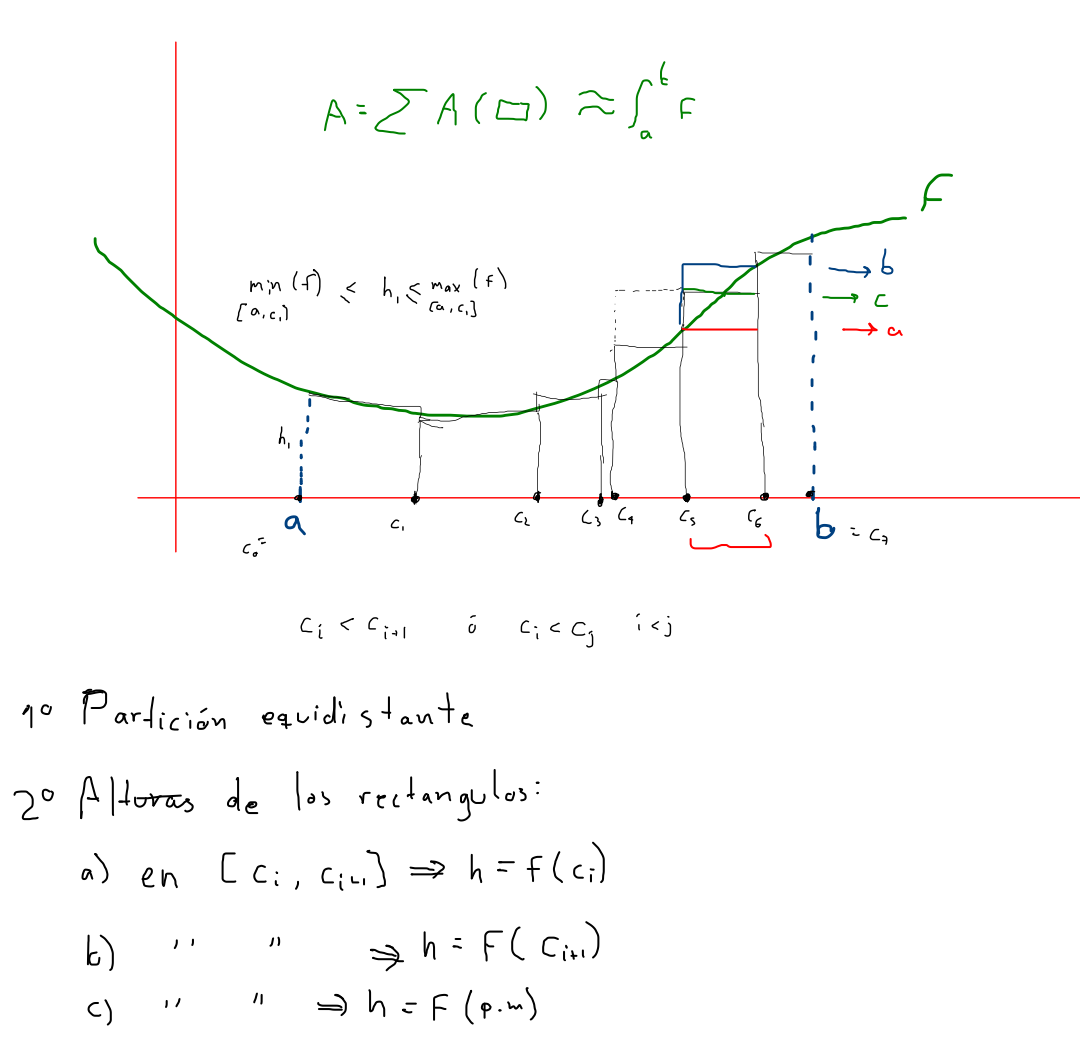

Este gift nos muestra cómo funciona la aproximación por sumas de Riemann:

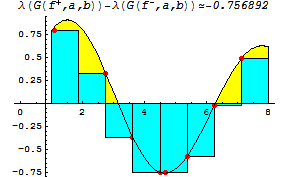

In [ ]:
## Paso 1. definir la función y el intervalo


def f(x):
    return x**2


a = 0

b = 2



$$\int_0^2 x^2\ d x = \left.\frac{x^3}{3}\right|_0^2 = \frac{8}{3}$$

$$\int_0^2 x^2\ d x \approx \sum_{i=1}^n A(rect_i) = \sum_{i=1}^n b_i\cdot h_i = b\sum_{i=1}^n h_i = b\sum_{i=1}^n f(x_i)$$

In [ ]:
## Paso 2. Definir nuestra partición

import numpy as np

a = 0
b = 2

X = np.linspace(a,b,10_000_001)

## Paso 3. Calcular las alturas de mis rectángulos

## vamos a ver el caso en el que h = f(en el extremo izquierdo)
integrando = f(X)  #alturas de los rectángulos

h = X[1] - X[0]   #ancho del rectángulo

integral = integrando[1:].sum() * h  #integral por la izquierda
integral


In [ ]:
8/3

In [ ]:
a = 1
b = 1_000_000

X = np.linspace(a,b,100_000_001)
X

$$\int_1^\infty e^{-x}\ dx = \frac{1}{e}$$

In [ ]:
import math
def f(x):
    return math.exp(-x)

In [ ]:
f(X)

In [ ]:
import math
def f(x):
    return math.exp(-x)

X = np.array([1,2,3])

np.array([f(x_i) for x_i in X])

In [ ]:
import math

a = 1
b = 1_000_000

def f(x):
    return math.exp(-x)


X = np.linspace(a,b,10_000_001)

mid_X = (X[1:] + X[:-1]) / 2

integrand = np.array([f(x_i) for x_i in X])
integrand_mid = np.array([f(x_i) for x_i in mid_X])

delta_X = X[1] - X[0]  #ancho del rectángulo

integral_left = np.sum(integrand[:-1]) * delta_X
print("Suma de Riemann por la izquierda:", integral_left)

integral_right = np.sum(integrand[1:]) * delta_X
print("Suma de Riemann por la derecha:", integral_right)

integral_mid = np.sum(integrand_mid) * delta_X
print("Regla del punto medio:", integral_mid)

trapecio = 0.5 * np.sum(integrand[1:] + integrand[:-1]) * delta_X  ## = (integral_left + integral_right) / 2
print("Regla del trapecio:", trapecio)

In [ ]:
# integral por izquierda + integral por derecha = trapecio
(0.36972007694570796 + 0.36604492457688154) / 2

In [ ]:
1/math.e

In [ ]:
X = np.linspace(0,10,11)

print(X)

mid_X = (X[1:] + X[:-1]) / 2
mid_X

In [ ]:
X[1:]

In [ ]:
X[:-1]

In [ ]:
import sympy

In [ ]:
dir(sympy)

In [ ]:
from sympy import *   # estoy importando todo el paquete pero ya no necesito poner el nombre para acceder a las funciones
x, y, z = symbols('x y z')

In [ ]:
x, y, z

In [ ]:
diff(cos(x*y), x)

In [ ]:
integrate(exp(-x), x)

In [ ]:
integrate(exp(-x), (x, 1, oo))

In [ ]:
z = cos(x*y)
z

> <h2 style="color:darkorange"> $\ll\!\!\prec\quad$ Tarea 2 $\quad\succ\!\!\gg$ </h2>


> $\quad$ ENTREGA máximo jueves 16 de julio antes de la clase

Resolver 3 de 4 problemas.

1. Pedir al usuario un número entero positivo [N] mayor que dos - asegurarse de esto usando gestión de erorres o algún otro método que se les ocurra. Imprima en una lista de listas las tablas de multiplicar hasta el número N.


```
Dame un número entero mayor que dos: 14

Tabla del 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Tabla del 2: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
Tabla del 3: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
Tabla del 4: [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
Tabla del 5: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
Tabla del 6: [6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
Tabla del 7: [7, 14, 21, 28, 35, 42, 49, 56, 63, 70]
Tabla del 8: [8, 16, 24, 32, 40, 48, 56, 64, 72, 80]
Tabla del 9: [9, 18, 27, 36, 45, 54, 63, 72, 81, 90]
Tabla del 10: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Tabla del 11: [11, 22, 33, 44, 55, 66, 77, 88, 99, 110]
Tabla del 12: [12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
Tabla del 13: [13, 26, 39, 52, 65, 78, 91, 104, 117, 130]
Tabla del 14: [14, 28, 42, 56, 70, 84, 98, 112, 126, 140]
```

2. Para valuar derivados lineales (bonos, swaps, etc) es muy útil contar con funciones para calcular fechas de pago. Genere tres funciones que reciban una fecha (tipo datetime) y un entero para sumar el número de dias/meses/años que se quiera. (shift_date_by_days, etc)


Ejemplo:

```python
def shift_date_by_days(date, n_days):  # date es datetime, n_days es entero
    return date + n_days

def shift_date_by_months(date, n_months):  # date es datetime, n_months es entero
    return date + n_months

def shift_date_by_years(date, n_years):  # date es datetime, n_years es entero
    return date + n_years
```

Usando las funciones anteriores, generalice el ejercicio para construir la función:

```python
def shift_date_by_tenor(date, tenor)   ## date es datetime, tenor es string del tipo "28D", "1M", "3Y", etc
```

OJO: Se puede usar relativedelta


```python
today = datetime(2023, 6, 27)

tenor = "3Y"

shift_date_by_tenor(today, tenor)

  >> datetime(2026, 6, 27)
```

In [ ]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

today = datetime(2024,12,3)
today

In [ ]:
relativedelta(years=2)

In [ ]:
today + relativedelta(years=2)

In [ ]:
def shift_date_by_days(fecha, n_days):
    return fecha + relativedelta(days=n_days)

In [ ]:
shift_date_by_days(today, 1)

In [ ]:
###   (t + n_days) + n_months  !=   (t + n_months ) + n_days

fecha_1 = datetime(2024,2,28)

(fecha_1 + relativedelta(days=2)) + relativedelta(months=1)


In [ ]:
(fecha_1 + relativedelta(months=1)) + relativedelta(days=2)

2.1 ¿De qué manera podríamos usar un vector de holidays para calcular fechas de vencimiento?

3. Usando recurrencia, calcule el límite de las siguientes sucesiones ($\epsilon = 10^{-7}$):

a) $$a_n = \sqrt{2\,a_{n-1}},\qquad a_0=1\qquad\quad \mbox{Es decir,}\quad a_n = \sqrt{2\sqrt{2\sqrt{2\sqrt{2\sqrt{2\cdots}}}}}\quad\mbox{n-veces}$$

b) $$b_{n+1} = \frac{1}{2}\left(b_n + \frac{25}{b_n}\right), \qquad b_1 =3$$


Vamos a suponer que ya convergió cuando

$$|f(n) - f(n+1)| < \epsilon $$

Ejemplo rápido:

$$a_n = \frac{2n+1}{3n-2}$$

In [36]:
def sucesion(n):
    return (2*n + 1) / (3*n-2)

In [37]:
sucesion(2)

1.25

In [38]:
[sucesion(i) for i in range(1,1001)]

[3.0,
 1.25,
 1.0,
 0.9,
 0.8461538461538461,
 0.8125,
 0.7894736842105263,
 0.7727272727272727,
 0.76,
 0.75,
 0.7419354838709677,
 0.7352941176470589,
 0.7297297297297297,
 0.725,
 0.7209302325581395,
 0.717391304347826,
 0.7142857142857143,
 0.7115384615384616,
 0.7090909090909091,
 0.7068965517241379,
 0.7049180327868853,
 0.703125,
 0.7014925373134329,
 0.7,
 0.6986301369863014,
 0.6973684210526315,
 0.6962025316455697,
 0.6951219512195121,
 0.6941176470588235,
 0.6931818181818182,
 0.6923076923076923,
 0.6914893617021277,
 0.6907216494845361,
 0.69,
 0.6893203883495146,
 0.6886792452830188,
 0.6880733944954128,
 0.6875,
 0.6869565217391305,
 0.6864406779661016,
 0.6859504132231405,
 0.6854838709677419,
 0.6850393700787402,
 0.6846153846153846,
 0.6842105263157895,
 0.6838235294117647,
 0.6834532374100719,
 0.6830985915492958,
 0.6827586206896552,
 0.6824324324324325,
 0.6821192052980133,
 0.6818181818181818,
 0.6815286624203821,
 0.68125,
 0.6809815950920245,
 0.6807228915662651,

In [ ]:
s = [sucesion(i) for i in range(1,10_000_001)]

abs(s[-1] - s[-2]) < 1e-7

In [ ]:
s[-1]

**Bosquejo de la posible solución:**

1. Construir una función que me de el n-ésimo término usando recurrencia

1.1 Construir una función que te dé los primeros n términos de la sucesión

2. Calcular los términos que sean necesarios para que la condición de convergencia se cumpla

**4.** Crea una función que reciba dos enteros positivos (asegurarse de esto con gestión de errores) y devuelva una matriz de números enteros aleatorios entre 1 y 10.

In [ ]:
rows = 4
cols = 2

array([[1,2],
[1,2],
[1,2],
[1,2]])